<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install -q kaggle

In [72]:
from google.colab import files

In [73]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nikhilsatani","key":"ec88f260eb867087af019a6f279845ff"}'}

In [74]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [75]:
 ! chmod 600 ~/.kaggle/kaggle.json



In [76]:
! kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           3122        131  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           3155        121  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-01 15:58:10           2051         72  0.9705882        
ericsims/world-cheese-awards-worlds-cheesiest-dataset  World Cheese Awards (World's Cheesiest Dataset)   49KB  2022-08-1

In [77]:
!kaggle competitions download -c bluebook-for-bulldozers

bluebook-for-bulldozers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
!unzip '/content/bluebook-for-bulldozers.zip'

Archive:  /content/bluebook-for-bulldozers.zip
replace Data Dictionary.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Data Dictionary.xlsx    
replace Machine_Appendix.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Machine_Appendix.csv    
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test.csv                
replace Train.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train.7z                
replace Train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train.zip               
replace TrainAndValid.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TrainAndValid.7z        
replace TrainAndValid.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TrainAndValid.csv       
replace TrainAndValid.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TrainAndValid.zip       
replace Valid.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Valid.7z                
replace Valid.csv? [y]es, [n]o, [A]ll,

In [79]:
from fastai.tabular.all import *

In [80]:
path = Path()

In [81]:
path.ls(file_type='text')

(#7) [Path('Machine_Appendix.csv'),Path('Valid.csv'),Path('TrainAndValid.csv'),Path('median_benchmark.csv'),Path('ValidSolution.csv'),Path('Test.csv'),Path('random_forest_benchmark_test.csv')]

In [82]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [83]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [84]:
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact'

In [85]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [86]:
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

In [87]:
df = add_datepart(df, 'saledate')

In [88]:
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [89]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [90]:
procs = [Categorify, FillMissing]

In [91]:
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

In [92]:
splits = (list(train_idx), list(valid_idx))

In [93]:
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [94]:
len(to.train), len(to.valid)

(404710, 7988)

In [95]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [96]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,...,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,...,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,...,57,1,1,1,1,1,1,1.077754e+09,1,1


In [97]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [98]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [100]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [101]:
from sklearn.tree import export_graphviz
import graphviz
def draw_tree(t, df, size=10, ratio=0.6, precision=0, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))



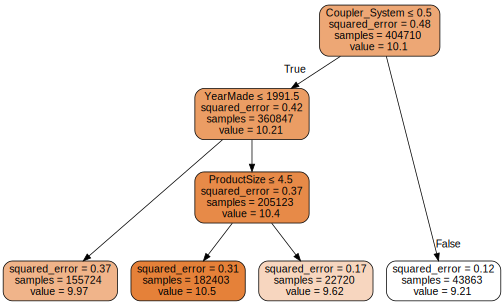

In [102]:
draw_tree(m, xs, size=7, leaves_parallel=True, precision=2)

In [103]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from dtreeviz.trees import *

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


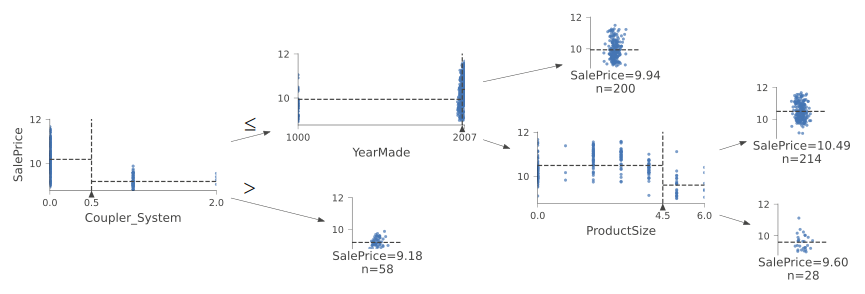

In [105]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
         fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
         orientation='LR')

In [106]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

In [107]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [108]:
def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [109]:
m_rmse(m, xs, y)

0.0

In [110]:
m_rmse(m, valid_xs, valid_y)

0.335994

In [111]:
m.get_n_leaves(), len(xs)

(324562, 404710)

In [112]:
m = DecisionTreeRegressor()
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.135939, 0.364561)

In [113]:
def rf(xs, y, n_estimators=100, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
  return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                               max_samples=max_samples, max_features=max_features,
                               min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)



In [114]:
m = rf(xs, y)

In [115]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.169836, 0.231295)

In [116]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [117]:
r_mse(preds.mean(0), valid_y)

0.231295

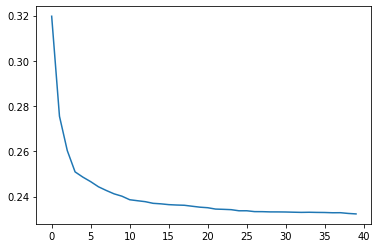

In [118]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [119]:
r_mse(m.oob_prediction_, y)

0.208909

In [120]:
preds.shape

(100, 7988)

In [121]:
preds_std = preds.std(0)

In [122]:
preds_std[:5]

array([0.23418431, 0.11856246, 0.12185211, 0.22877425, 0.1444407 ])

In [123]:
def rf_feat_importance(m, df):
  return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [124]:
fi = rf_feat_importance(m, xs)

In [125]:
fi[:10]

,cols,imp
57,YearMade,0.180710
6,ProductSize,0.120440
30,Coupler_System,0.119275
7,fiProductClassDesc,0.074766
54,ModelID,0.055335
65,saleElapsed,0.049724
3,fiSecondaryDesc,0.044860
31,Grouser_Tracks,0.042062
32,Hydraulics_Flow,0.039637
1,fiModelDesc,0.029763


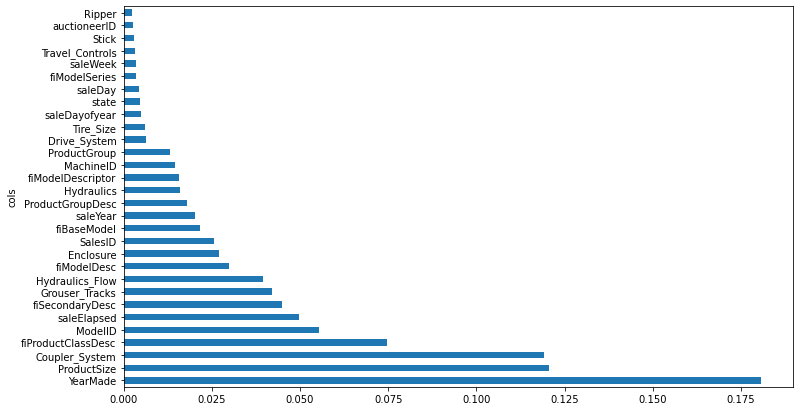

In [126]:
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [127]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [128]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y)

In [129]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.180337, 0.230337)

In [130]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

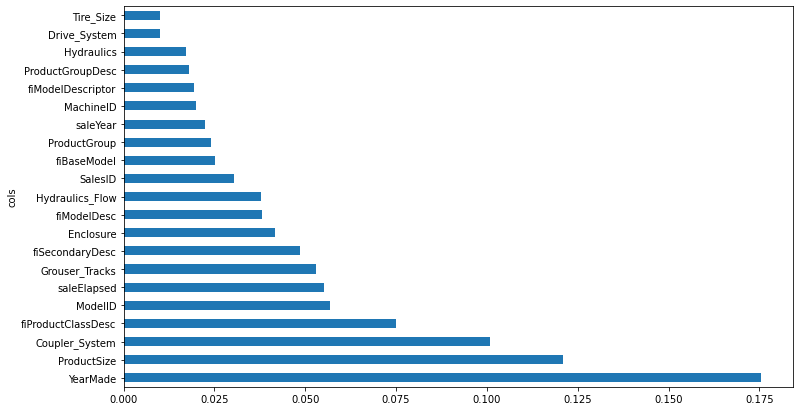

In [131]:
plot_fi(rf_feat_importance(m, xs_imp));

In [133]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

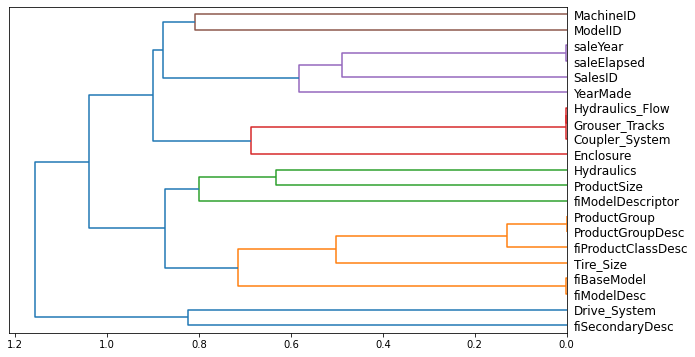

In [134]:
cluster_columns(xs_imp)

In [135]:
def get_oob(df):
  m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15, max_samples=50000,
                            max_features=0.5, n_jobs=-1, oob_score=True)
  m.fit(df, y)
  return m.oob_score_

In [136]:
get_oob(xs_imp)

0.8773959286285141

In [139]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc', 'ProductGroup',
    'fiModelDesc', 'fiBaseModel', 'Hydraulics_Flow', 'Grouser_Tracks', 'Coupler_System'
)}

{'saleYear': 0.8763421386998248,
 'saleElapsed': 0.8726513615964792,
 'ProductGroupDesc': 0.8771471500730214,
 'ProductGroup': 0.8776279418289228,
 'fiModelDesc': 0.87634019400992,
 'fiBaseModel': 0.8760616037203092,
 'Hydraulics_Flow': 0.8772236186563859,
 'Grouser_Tracks': 0.878095969665289,
 'Coupler_System': 0.8775996995181474}

In [140]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8745035662631451

In [141]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [143]:
m = rf(xs_final, y)

In [144]:
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.182228, 0.231714)